### Import packages
Note the follwing package versions were used: 
Langchain == 0.0.334
langchain-experimental==0.0.37
openai==1.2.0

In [1]:
import os
from dotenv import load_dotenv
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.llms import OpenAI
import pandas as pd

### Set variables
Note: Open AI key is set in a .env file. This is not stored on git hub. You will need to create your own .env file and assign your openai key.

In [2]:
load_dotenv()
OPENAI_MODEL = " gpt-4-1106-preview"
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

### Read in data
Note: rows are skipped to prevent an error, this was not handled by the agent.

In [3]:
file_path = "./data/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_5728866.csv"
data = pd.read_csv(file_path, skiprows=4)

### generate the agent

In [4]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),data, verbose=True )
agent.agent.llm_chain.prompt.template


'\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nYou should use the tools below to answer the question posed of you:\n\npython_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [python_repl_ast]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\n\nThis is the result of `print(df.head())`:\n{df_head}\n\nBegin!\nQuestion: {input}\n{agent_scratchpad}'

### First Prompt

In [5]:
prompt_00 = "Analyse the data for Switzerland and the UK"

In [6]:
result_00 = agent.run(prompt_00)
print(result_00)



> Entering new AgentExecutor chain...
Thought: I need to find the rows for Switzerland and the UK
Action: python_repl_ast
Action Input: df[df['Country Name'].isin(['Switzerland', 'United Kingdom'])]
Observation:       Country Name Country Code  \
37     Switzerland          CHE   
81  United Kingdom          GBR   

                                   Indicator Name     Indicator Code  1960  \
37  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
81  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

    1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
81   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
81   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   N

### Second prompt
Note: The agent was unable to generate a response to this prompt. My token limits were quickly breached. It is possible that on a higher OpenAI usage tier with larger token limits and given that the response is not always the same that this might work. But the reasoning below does not suggest it was going in the right direction.

In [7]:
prompt_01 ="Calculate annual average growth in GDP per capita for the UK and Switzerland for each decade from 1900 to 2020"

In [8]:
result_01 = agent.run(prompt_01)
print(result_01)



> Entering new AgentExecutor chain...
Thought: I need to calculate the average growth rate for each decade
Action: python_repl_ast
Action Input: 

# Calculate the average growth rate for each decade

# Create a list of the years
years = list(range(1960, 2021))

# Create a list of the decades
decades = [str(year)[:3] + '0s' for year in years]

# Create a dataframe with the countries and decades
df_decades = df[(df['Country Name'] == 'United Kingdom') | (df['Country Name'] == 'Switzerland')].groupby(['Country Name', 'Indicator Name', 'Indicator Code'] + decades).mean()

# Calculate the average growth rate for each decade
df_decades['growth_rate'] = df_decades.apply(lambda x: (x[2020] - x[1960]) / x[1960], axis=1)

Observation: KeyError: '1960s'
Thought: I need to adjust the list of decades
Action: python_repl_ast
Action Input: 

# Calculate the average growth rate for each decade

# Create a list of the years
years = list(range(1960, 2021))

# Create a list of the decades
decades = [st

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 4097 tokens, however you requested 4178 tokens (3922 in your prompt; 256 for the completion). Please reduce your prompt; or completion length.", 'type': 'invalid_request_error', 'param': None, 'code': None}}

### Third prompt



> Entering new AgentExecutor chain...
Thought: I need to get the data for the UK and Switzerland
Action: python_repl_ast
Action Input: df[(df['Country Name'] == 'United Kingdom') | (df['Country Name'] == 'Switzerland')]
Observation:       Country Name Country Code  \
37     Switzerland          CHE   
81  United Kingdom          GBR   

                                   Indicator Name     Indicator Code  1960  \
37  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
81  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

    1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  1972  \
37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
81   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

    1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984  \
37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
81   NaN   NaN   NaN   NaN   NaN 

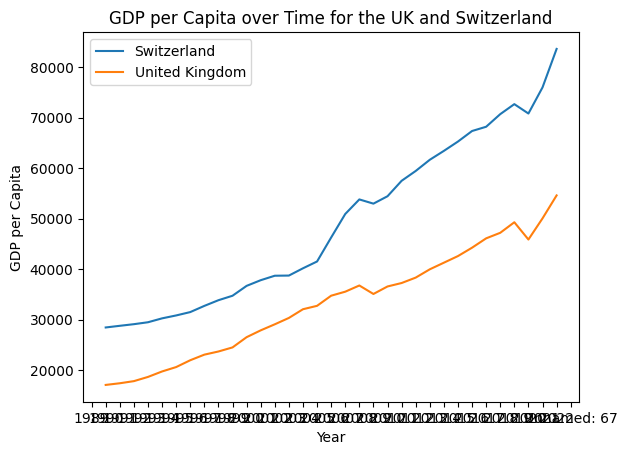

In [9]:
prompt_01 ="Plot a chart of GDP per Capita over time for the UK and Switzerland. save the chart as 'ch_uk_1011.png'"
result_01 = agent.run(prompt_01)
print(result_01)